# Logistic Regression

Aim: We need to predict if person survived or not in the titanic ship sink disaster

In [1]:
# Import essential basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [2]:
titanic_data = pd.read_csv("Datasets/titanic.csv")

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Analyzing the Dataset

Countplot we use to find the ratio between 2 categories

<AxesSubplot:xlabel='Survived', ylabel='count'>

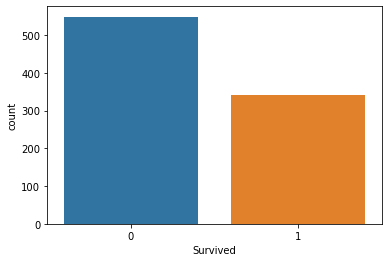

In [6]:
sns.countplot(data=titanic_data,x="Survived")

more number of non-survivors than no of survivors.

<AxesSubplot:xlabel='Survived', ylabel='count'>

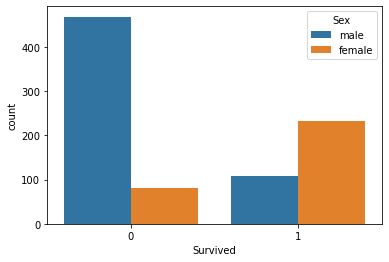

In [7]:
sns.countplot(data=titanic_data,x="Survived",hue="Sex")

Passengers with a Sex of Male were much more likely to be non-survivors than passengers with a Sex of Female.

<AxesSubplot:xlabel='Survived', ylabel='count'>

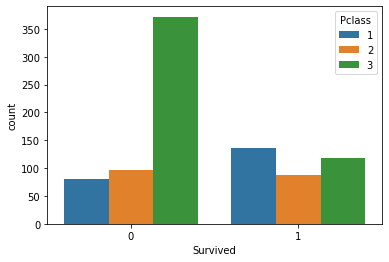

In [8]:
sns.countplot(data=titanic_data,x="Survived",hue="Pclass")

People of Pclass equal to 3 had the least chances of surviving indicating Pclass being the lowest class had high number of passengers too.See below confirmation too.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

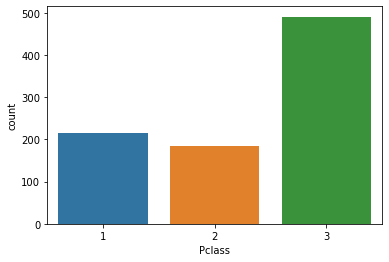

In [9]:
sns.countplot(data=titanic_data,x="Pclass")

<AxesSubplot:ylabel='Frequency'>

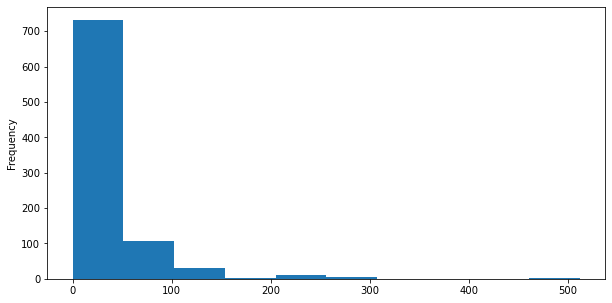

In [10]:
titanic_data["Fare"].plot.hist(figsize=(10,5))

We can see, 3 distinct groups of Fare prices here.The differenct Fare groups probably correspond to the different Pclass categories.As 3 pclass categories we conclude 3 distinct Fare Groups

<AxesSubplot:ylabel='Frequency'>

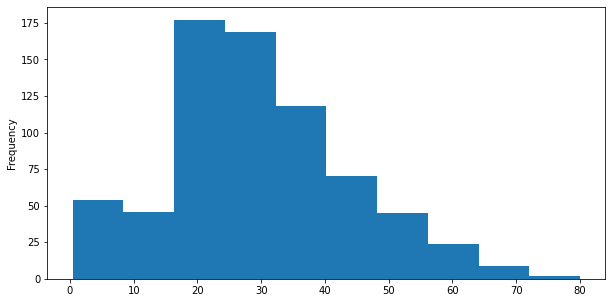

In [11]:
titanic_data["Age"].dropna().plot.hist(figsize=(10,5))

From the age distribution in Histogram one thing we can clearly see is most passengers belonged to age group between 20 and 30,Least being the older people above 60 were on the ship, Also there were kids below 10 years who had frequency of 50 plus

<AxesSubplot:xlabel='Age', ylabel='count'>

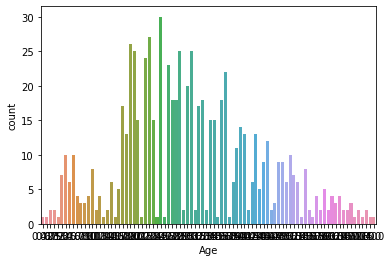

In [12]:
sns.countplot(data=titanic_data,x="Age")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

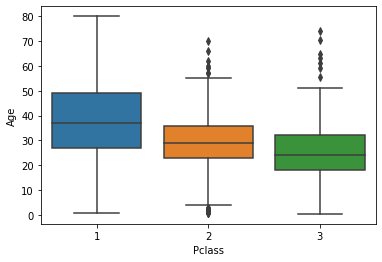

In [13]:
sns.boxplot(data=titanic_data,x="Pclass",y="Age")

Notice in above graph how age ranges are different entirely for the classes.
Older passengers being in the pclass-1 and youngest in pclass-3(cheaper fare class)

# Data Cleaning

In [14]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

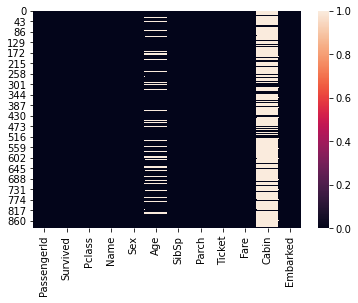

In [15]:
sns.heatmap(titanic_data.isnull())

white lines indicate missing values in the dataset. Age and Cabin columns contain majority of the missing data.But as see Age is comparitively having less missing values and cabin info would not be necessary as pclass and fare also are enough, we can drop cabin and for age impute the missing values
Based on the pclass the passenger belongs to we will fill(impute) the age column with the average age of that pclass passengers.


In [16]:
titanic_data1 = titanic_data

In [17]:
def impute_age(cols):
        Age = cols[0]
        Pclass = cols[1]

        if pd.isnull(Age):

            if Pclass == 1:
                return 37

            elif Pclass == 2:
                return 29

            else:
                return 24

        else:
            return Age


In [18]:
titanic_data['Age'] = titanic_data[['Age','Pclass']].apply(impute_age,axis=1)#filling the missing values

In [19]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
titanic_data.dropna(inplace=True)

In [21]:
titanic_data=titanic_data.reset_index(drop=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [22]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

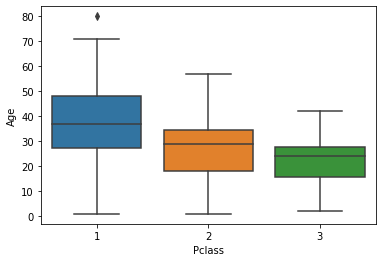

In [23]:
sns.boxplot(data=titanic_data,x="Pclass",y="Age")

# EDA


Let's create dummy variables
where one column is predictor of the other and viceversa, so remove one

In [24]:
#sex=pd.get_dummies(titanic_data['Sex'])
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)

sex.head(10)

,male
0,0
1,0
2,1
3,0
4,0
5,1
6,1
7,1
8,0
9,0


In [25]:
pcl=pd.get_dummies(titanic_data['Pclass'],drop_first=True)
pcl.head(10)

,2,3
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0


In [26]:
Emb=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
Emb.head(10)

,Q,S
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,0
9,0,0


In [27]:
titanic_data = pd.concat([titanic_data, sex,pcl,Emb], axis = 1)

In [28]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,2,3,Q,S
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,0,1
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,0,0,1
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1,0,1
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,0,0,1


In [29]:
print(titanic_data.columns)

Index(['PassengerId',    'Survived',      'Pclass',        'Name',
               'Sex',         'Age',       'SibSp',       'Parch',
            'Ticket',        'Fare',       'Cabin',    'Embarked',
              'male',             2,             3,           'Q',
                 'S'],
      dtype='object')


Drop the unnecessary columns

In [30]:
titanic_data.drop(['PassengerId','Name','Sex','Pclass','Ticket','Cabin','Embarked'],axis = 1,inplace=True)

In [31]:
print(titanic_data.columns)

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 2, 3, 'Q', 'S'], dtype='object')


In [32]:
titanic_data.head(5)

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,1,38.0,1,0,71.2833,0,0,0,0,0
1,1,35.0,1,0,53.1000,0,0,0,0,1
2,0,54.0,0,0,51.8625,1,0,0,0,1
3,1,4.0,1,1,16.7000,0,0,1,0,1
4,1,58.0,0,0,26.5500,0,0,0,0,1


Logistic Regression Algo

In [33]:
X_data = titanic_data.drop('Survived', axis = 1)
Y_data = titanic_data['Survived']

In [34]:
X_data

,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,38.0,1,0,71.2833,0,0,0,0,0
1,35.0,1,0,53.1000,0,0,0,0,1
2,54.0,0,0,51.8625,1,0,0,0,1
3,4.0,1,1,16.7000,0,0,1,0,1
4,58.0,0,0,26.5500,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
197,47.0,1,1,52.5542,0,0,0,0,1
198,33.0,0,0,5.0000,1,0,0,0,1
199,56.0,0,1,83.1583,0,0,0,0,0
200,19.0,0,0,30.0000,0,0,0,0,1


In [35]:
Y_data

0      1
1      1
2      0
3      1
4      1
      ..
197    1
198    0
199    1
200    1
201    1
Name: Survived, Length: 202, dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler
standardScalerX = StandardScaler()
X_data = standardScalerX.fit_transform(X_data)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data, test_size=0.3, random_state=1)

# X_train contains 70% of total dataset
print(X_train.shape)
print(Y_train.shape)
# X_test contains 30% of total dataset
print(X_test.shape)
print(Y_test.shape)

(161, 9)
(161,)
(41, 9)
(41,)


In [71]:
model= LogisticRegression()
#Train/fit the model to training data 
model.fit(X_train,Y_train)

LogisticRegression()

In [72]:
predictions = model.predict(X_test)

In [73]:
from sklearn.metrics import classification_report 

In [74]:
classification_report(Y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.71      0.62      0.67        16\n           1       0.78      0.84      0.81        25\n\n    accuracy                           0.76        41\n   macro avg       0.75      0.73      0.74        41\nweighted avg       0.75      0.76      0.75        41\n'

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(Y_test,predictions)

array([[10,  6],
       [ 4, 21]], dtype=int64)

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(Y_test,predictions)

0.7560975609756098